In [1]:
import fastbook
from fastai.vision.all import *
from pathlib import Path


In [2]:
# Set up fastbook
fastbook.setup_book()
os.environ["OMP_NUM_THREADS"] = "1"


In [3]:
# Define the path to the DermNet dataset directory
path = Path("dermnet")

In [4]:
# Define the DataBlock for DermNet dataset with reduced batch size
dermnet_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
)

In [5]:
# Load the DermNet dataset with reduced batch size
dls = dermnet_data.dataloaders(path,bs=3)  # Reduced batch size to 8


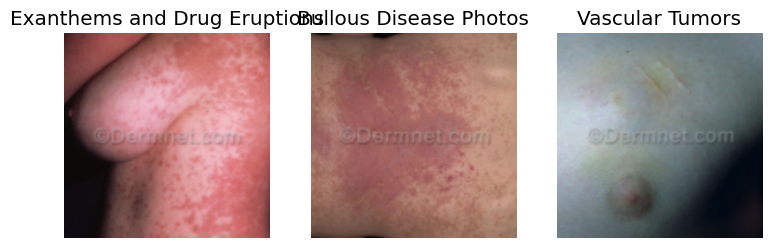

In [6]:
# Display a batch of images from the validation set
dls.valid.show_batch(max_n=4, nrows=1)


In [7]:
# Create a vision learner using ResNet18 architecture with reduced batch size
learn = vision_learner(dls, resnet18, metrics=error_rate)


In [8]:
# Fine-tune the model with reduced batch size
learn.fine_tune(4)
#4

epoch,train_loss,valid_loss,error_rate,time
0,3.131741,2.750672,0.766812,04:31


epoch,train_loss,valid_loss,error_rate,time
0,2.931857,2.790845,0.784965,05:14
1,2.904717,2.809076,0.799284,05:10
2,2.737841,2.567586,0.756840,05:10
3,2.634467,2.546968,0.737407,05:12


In [9]:
# Evaluate the model's accuracy on the validation set
accuracy = learn.validate()[1]
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.7374
